title: "**Bridging	the	Gap:	Every	Pregnancy	Counts**" author: "Juliette LESTARD" date: "April 27 2025"

---
format:
  html:
    toc: true
    theme: sandstone
    embed-resources: true
    code-fold: true
    self-contained: true
    css: custom-style.css

execute:
  echo: false
  warning: false
  message: false
  error: false

---

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/UNICEF_Logo.png/320px-UNICEF_Logo.png" width="120"/>
{fig-align="center" width="186" height="46"}


**520	million	women**	(aged	15-49)	do	not	have	access	to	antenatal	care	by	skilled	professionals	during	their pregnancy.

According	to	the	WHO,	**a	minimum	of	eight	antenatal	visits** are	needed to	reduce	perinatal	mortality	and	to	improve	women’s	experience	of	care.

Click	here	to	see	the African Union	report	on	maternal health. [texte du lien](https://https://portal.africa-union.org/DVD/Documents/DOC-AU-WD/EX%20CL%20737%20(XXI)%20_F.pdf)

Click	here	to	donate	to	"Médecins	du	monde."



<p align="center">
  <a href="https://www.medecinsdumonde.org/nous-soutenir/faire-un-don-association-humanitaire/">
    <img src="https://img.icons8.com/fluency/96/000000/like--v1.png" height="30" style="vertical-align:middle"/>
    <span style="background:#F31111;color:#fff;padding:10px 22px 10px 8px;font-size:22px;border-radius:24px;font-weight:bold;vertical-align:middle;box-shadow:2px 2px 8px #bbb;">DONATE</span>
  </a>
</p>


In [2]:
%matplotlib inline



In [43]:
from google.colab import drive
drive.mount("/content/drive")

import polars as pl
import numpy as np
from plotnine import *
import geopandas as gp
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install -q plotnine polars

In [6]:
 df_antenatal_care = pl.read_csv("/content/drive/MyDrive/unicef-quarto-report/unicef_indicator_2.csv",separator=";")

In [7]:
print(df_antenatal_care.columns)


['country', 'time_period', 'obs_value', 'region']


In [34]:
df_antenatal_care = df_antenatal_care.rename({
    col: col.strip() for col in df_antenatal_care.columns
})


In [13]:
df_antenatal_care = df_antenatal_care.select(
    pl.col('country').alias('country'),
    pl.col('year').alias('year'),
    pl.col('Antenatal_1plus_Visit_Rate').alias('Antenatal_1plus_Visit_Rate')
)


In [14]:
 df_meta = pl.read_csv(
    "/content/drive/MyDrive/unicef-quarto-report/unicef_metadata.csv",
    separator=";",
    infer_schema_length=0,   # Force tout en str
    try_parse_dates=True
)

df_meta=(df_meta.select(
    pl.col("country").alias("country"),
    pl.col("year").alias("year"), pl.col("GDP per capita (constant 2015 US$)").alias("GDP per capita"), pl.col("Population, total").alias("population")
))

In [15]:
df_death = pl.read_csv("/content/drive/MyDrive/unicef-quarto-report/Albania.csv",separator=";")
print(df_death.columns)

['country', 'death_per_100,000 ']


In [16]:
df_death = (df_death.select(
    pl.col("country").alias("country"),
    pl.col("death_per_100,000 ").alias("death")
))

In [17]:
df_merged = df_antenatal_care.join(
    df_meta,
    on="country",
    how="left"
)

df_death_merged = df_antenatal_care.join(
    df_death,
    on="country",
    how="left"
)

In [18]:
import geopandas as gpd

shape_world = gpd.read_file(
    "https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/world-administrative-boundaries/exports/shp"
)


In [19]:
shape_world = shape_world.rename(columns={'name': 'country'})


In [20]:
import pandas as pd
import geopandas as gpd
from plotnine import (
    aes,
    geom_map,
    ggplot,
    coord_fixed,
    scale_fill_gradient,
    theme_light,
    labs,
)
from shapely.geometry import Polygon

country_code = pl.read_csv("https://raw.githubusercontent.com/adrivsh/country_names/refs/heads/master/names_to_iso.csv")
UNICEF_full = df_antenatal_care.join(country_code, on="country", how="left")
shape_world = gpd.read_file(
    "https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/world-administrative-boundaries/exports/shp")

print(UNICEF_full.columns)
mapdata = shape_world.merge(UNICEF_full.to_pandas(), on="iso3", how="left")


from plotnine import *

p = (
    ggplot(mapdata)
    + aes(fill="Antenatal_1plus_Visit_Rate")
    + geom_map()
    + coord_fixed()
    + scale_fill_gradient(low="#b5e2fa", high="#003366", name="Antenatal 1+ visit rate")
    + theme_light()
    + theme(
        figure_size=(20, 12),
        axis_text=element_text(size=12),
        legend_title=element_text(size=12),
        legend_text=element_text(size=9),
        plot_title=element_text(size=19),
        plot_subtitle=element_text(size=12),
        plot_caption=element_text(size=8),
    )
    + labs(
        title="Global distribution of antenatal 1+ visit rates by country",
        subtitle="Where do women get access to at least one antenatal care visit?",
        caption="Source: UNICEF, Natural Earth",
        fill="Antenatal 1+ Visit Rate"
    )
)

import matplotlib.pyplot as plt
fig = p.draw()
plt.show()


['country', 'year', 'Antenatal_1plus_Visit_Rate', 'iso2', 'iso3', 'isonum']


/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 20 x 12 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: carte_unicef.png


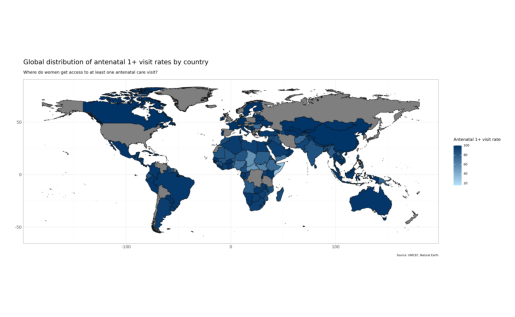

In [21]:
p.save("carte_unicef.png", dpi=300)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("carte_unicef.png")
plt.imshow(img)
plt.axis('off')
plt.show()


**But	why	is	it	so	important	to	have	8+ antenatal	care	visits	?**

Antenatal	care	is	essential	to:
*   Detect	and	prevent	complications	such	as gestational	diabete, anemia	or	preeclampsia,
*   Monitor	the	baby's development,
*   Protect	against	infections	and	diseases (by	providing	vaccins and	detecting	sexual	transmitted	infections),
*   Prepare	for	delivery	and newborn	care.

There	is	a	**negative	correlation**	between	antenatal	1+	visit	rates	and	maternal mortality.	*As	the	percentage	of	women	attending	at	least	one	antenatal	care appointment	with	a	skilled	professional	**increases**,	maternal	mortality **decreases**.*

In [22]:
from plotnine import *

p = (
    ggplot(df_death_merged)
    + aes(
        x="Antenatal_1plus_Visit_Rate",
        y="death"
    )
    + geom_point(color="#FFD700", size=3, alpha=0.7)
    + geom_smooth(method="lm", color="gray", size=1.2)
    + labs(
        title="Correlation between antenatal 1+ visit rate and maternal mortality",
        x="Antenatal 1+ visit rate (av.)",
        y="Number of deaths per 100,000 births"
    )
    + theme_light()
    + theme(
        figure_size=(9, 7),
        plot_title=element_text(style="italic", size=14),
        axis_title_x=element_text(size=12),
        axis_title_y=element_text(size=12),
        axis_text=element_text(size=11)
    )
)


/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 9 x 7 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: scatter_antenatal_death.png
/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 84 rows containing missing values.


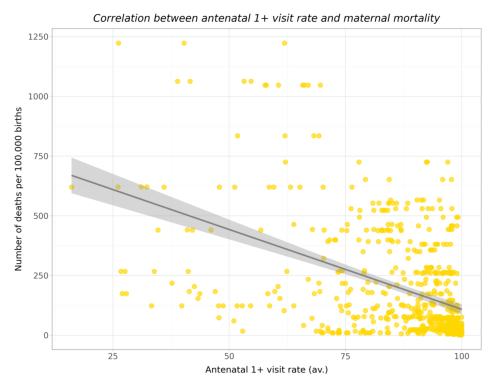

In [23]:
p.save("scatter_antenatal_death.png", dpi=300)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("scatter_antenatal_death.png")
plt.imshow(img)
plt.axis('off')
plt.show()


**But	why	women	do	not	have	access	to antenatal	care	?**

*   **High	healthcare	costs**:	some	women	*cannot	afford*	medical visits	or	ultrasounds.	In	Chad,	a	single	antenatal	visit	costs more	than	a	family's	monthly	income.
*   Some	women	**lack	education**	to	understand	how	important
 antenatal	care	is.	In	certain	communities,	women	also	believe
 that	pregnancy	is	a	*natural	process*	that does'nt require any intervention.
*   **Geographic	barriers**:	from	*poor	transportation*	to	*long	distances* to	reach	the	nearest	facility.
*   **Gender	disparities**:	*limited	decision-making	power*,	as	in	some cultures,	women	need	a	men's	approval	to	seek	healthcare. *Early	and	forced	marriages*	also	create	barriers,	and	women sometimes	do	not	dare	to	make	a	visit	by	fear	of	*judgement	and discrimination*.

Antenatal	care	is	**correlated**	to	*women	rights	worldwide*.

In [24]:
import polars as pl

regions = pl.read_csv("/content/drive/MyDrive/unicef-quarto-report/Regions.csv",separator=";")
regions = regions.rename({col: col.strip() for col in regions.columns})
print(regions.columns)  # Doit afficher ['country', 'region']

df_regions = regions.select(
    pl.col("country").alias("country"),
    pl.col("region").alias("region")
)
print(df_regions.head())


['country', 'region']
shape: (5, 2)
┌─────────────┬──────────────────────────────┐
│ country     ┆ region                       │
│ ---         ┆ ---                          │
│ str         ┆ str                          │
╞═════════════╪══════════════════════════════╡
│ Afghanistan ┆ Middle East and North Africa │
│ Afghanistan ┆ Middle East and North Africa │
│ Afghanistan ┆ Middle East and North Africa │
│ Afghanistan ┆ Middle East and North Africa │
│ Afghanistan ┆ Middle East and North Africa │
└─────────────┴──────────────────────────────┘


In [25]:
df_line = df_antenatal_care.join(
    regions.select(["country", "region"]),
    on="country",
    how="left"
).to_pandas()

In [26]:
from plotnine import *

p = (
    ggplot(df_line)
    + aes(
        x="year",
        y="Antenatal_1plus_Visit_Rate",
        color="region",
        group="region"
    )
    + geom_line(size=2)
    + geom_point(size=3)
    + geom_text(
        aes(label="Antenatal_1plus_Visit_Rate"),
        va='bottom', ha='left', size=8, nudge_y=2, format_string="{:.2f}"
    )
    + labs(
        title="Evolution of antenatal 1+ visit rate from 2000 to 2023",
        x="Year",
        y="Antenatal 1+ visit rate",
        color="Region"
    )
    + theme_light()
    + theme(
        figure_size=(14, 6),
        plot_title=element_text(style="italic", size=15),
        legend_position=(0.8, 0.75),
        legend_title=element_text(size=11),
        legend_text=element_text(size=10)
    )
)


/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 14 x 6 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: line_antenatal_rate.png


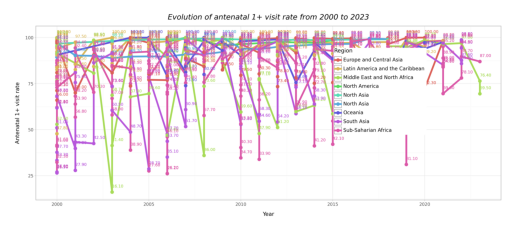

In [27]:
p.save("line_antenatal_rate.png", dpi=300)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("line_antenatal_rate.png")
plt.imshow(img)
plt.axis('off')
plt.show()


 As	you	can	see,	the	percentage	of  women	having	access	to	at	least	one	antenatal	care	visit	is increasing	globally,	for	instance	in	Afghanistan	(16,1%	in 2003,	to	76,4%	in	2023).	The	scale	and	pace	of	this	progress depend	greatly	on	the	region.	Stronger	progress	is needed	in all	burden	territories	(conflicts,	geographical	or	geopolitical issues...).

However	this	evolution	is	never	linear.	Coming	back	to
 Afghanistan,	the	talibans	took	back	the	power,	making
 a	big	difference	for	women	in	the	future.



In [29]:
df_regions = pl.read_csv("/content/drive/MyDrive/unicef-quarto-report/Regions.csv",separator=";")

In [30]:
df_regions = df_regions.select(
    pl.col('country').alias('country'),
    pl.col('region').alias('region')
)

In [31]:
df_regions_merged = df_antenatal_care.join(
    df_regions,
    on="country",
    how="left"
)

In [32]:
df_regions_merged_pd = df_regions_merged.to_pandas()


In [33]:
df_region_bar = (
    df_regions_merged_pd
    .groupby('region', as_index=False)['Antenatal_1plus_Visit_Rate']
    .mean()
)

In [41]:
from plotnine import *

p = (
    ggplot(df_region_bar)
    + aes(
        x='reorder(region, Antenatal_1plus_Visit_Rate)',
        y='Antenatal_1plus_Visit_Rate'
      )
    + geom_col(fill="#99c9ea", width=0.7)
    + labs(
        title="Antenatal 1+ visit rate by region",
        x="Region",
        y="Antenatal 1+ visit rate (av.)"
    )
    + theme_light()
    + theme(
        figure_size=(9, 5),
        axis_text_y=element_text(size=11),
        axis_text_x=element_text(size=10),
        plot_title=element_text(size=15, weight="bold")
    )
)

print(p)


<ggplot: (900 x 500)>


/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 9 x 5 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: bar_antenatal_rate.png


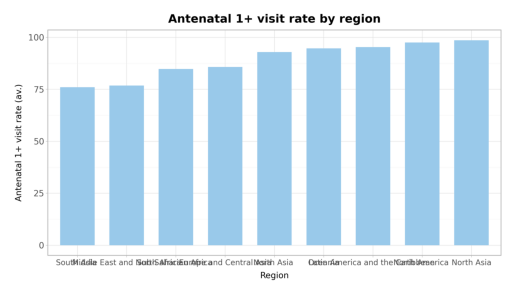

In [42]:
p.save("bar_antenatal_rate.png", dpi=300)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("bar_antenatal_rate.png")
plt.imshow(img)
plt.axis('off')
plt.show()

How	GDP	per	capita	shapes	access	to antenatal	care ?

  To	go	further,	you	can	observe	a	correlation	between	the
 GDP	per	capita	and	the	antenatal	1+	visit	rate.	Directly
 linked	to	the	GDP	per	capita,	poor	healthcare
 infrastructures	and	shortage	of	skilled	professionals,
 medicines	and	equipments	directly	impact	the	ability	of
 women	to	make	these	visits.	Conflicts	and	political
 instability	are	other	factors	of	inequality,	as	for	instance
 refugee	women	suffer	from	displacement	and	lack	of	legal
 status.

 Access	to	antenatal	care	performed	by	skills	professionals	is	essential	for	the	health	of	the	mother
 and	the	baby.	It	is	a	fundamental	right,	yet	too	many	women	are	deprived	of	it.	Between	regional	and
 political	disparities,	economical	and	cultural	factors,	women	are	once	again	the	collateral	damages	of
 human	actions.
 Strenghtening	healthcare	systems,	raising	awareness,	and	ensuring	financial	support	are	key	steps	to
 reduce	the	gap	in	maternal	health	services.
 Investing	in	antenatal	care	is	investing	in	the	future.